In [1]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py

--2020-02-23 06:33:43--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week03_convnets/cifar.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396 (2.3K) [text/plain]
Saving to: ‘cifar.py’

cifar.py            100%[===================>]   2.34K  --.-KB/s    in 0s      

2020-02-23 06:33:49 (66.2 MB/s) - ‘cifar.py’ saved [2396/2396]



In [0]:
import time

import numpy as np
import matplotlib.pyplot as plt

from cifar import load_cifar10

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms

In [0]:
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10("cifar_data")

class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                        'dog', 'frog', 'horse', 'ship',
                        'truck'])

print(X_train.shape,y_train.shape)

Dataset not found. Downloading...
(40000, 3, 32, 32) (40000,)


In [0]:
BATCH_SIZE = 128

In [0]:
transform_train = transforms.Compose([
   transforms.Resize(size=(224, 224)),
   transforms.ToTensor(),
])
trainset = torchvision.datasets.CIFAR10(root='cifar_data/', train=True, download=False,
                                        transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# Data Augmentation

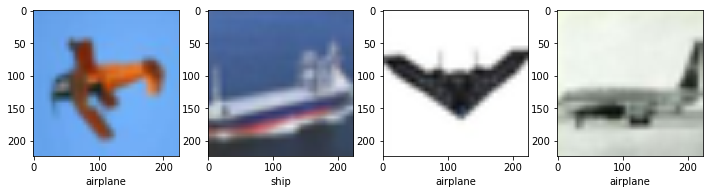

In [13]:
for (x_batch, y_batch) in trainloader:
    plt.figure(figsize=[12,10])
    for i in range(4):
        plt.subplot(3,4,i+1)
        plt.xlabel(class_names[y_batch.data.numpy()[i]])
        plt.imshow(np.transpose(x_batch.data.numpy()[i],[1,2,0]))
    plt.show()
    break

In [0]:
from torchvision.models.resnet import resnet18
from copy import deepcopy

In [0]:
NUM_CLASSES = 10
N_EPOCHS = 5

In [0]:
from copy import deepcopy
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [0]:
model = resnet18(pretrained=True)
model = deepcopy(model)
set_parameter_requires_grad(model, feature_extracting=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

In [0]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
compute_loss =  nn.CrossEntropyLoss()

In [0]:
history = []

In [0]:
%%time

model.train(True)
start_time = time.time()

for i in range(N_EPOCHS):
    for (x_batch, y_batch) in trainloader:
        y_pred = model(x_batch)
        loss = compute_loss(y_pred, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()

        history.append(loss)

        if (time.time() - start_time) > 60 * 5:
            raise Exception('Time Exceeded')

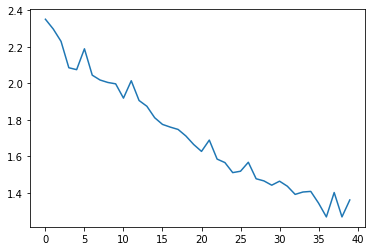

In [45]:
plt.plot(history)
plt.show()

In [46]:
model.train(False)

test_batch_acc = []
for i in range(0, len(X_val), 500):
    x_batch = torch.tensor(X_val[i: i+500], dtype=torch.float32)
    y_batch = y_val[i: i+500]
    logits = model(x_batch)
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))
    
print('Accuracy on validation {}'.format(np.mean(test_batch_acc)))

Accuracy on validation 0.20330000000000004


In [0]:
model.train(False)

test_batch_acc = []
for i in range(0, len(X_test), 500):
    x_batch = torch.tensor(X_test[i: i+500], dtype=torch.float32)
    y_batch = y_test[i: i+500].data.numpy()
    logits = model(x_batch)
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))
print('Accuracy on test {}'.format(np.mean(test_batch_acc)))